In [6]:
import os
import kaggle
import pandas as pd
from tqdm import tqdm
import shutil

In [7]:
# Read data
TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'
TRAIN_TIFF_PATH = "prostate-cancer-grade-assessment/train_images"
TRAIN_LABEL_TIFF_PATH = "prostate-cancer-grade-assessment/train_label_masks"
origin_postfix = '.tiff'
mask_postfix = '_mask.tiff'
all_data = pd.read_csv('train.csv')

In [9]:
karo_data = all_data[all_data["data_provider"] == "karolinska"]["image_id"]

In [5]:
# for i in tqdm(karo_data["image_id"]):
#     command = "kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/{}{} -p origin".format(i,origin_postfix)
#     print(command)
    # output1 = os.popen("kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/{}{} -p origin".format(i,origin_postfix))
    # output2 = os.popen("kaggle competitions download -c prostate-cancer-grade-assessment -f train_label_masks/{}{} -p mask".format(i,mask_postfix))
    # output1.read()
    # output2.read()
    # print(output1,output2)

100%|██████████| 5456/5456 [00:00<00:00, 545444.47it/s]

kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/0005f7aaab2800f6170c399693a96917.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/000920ad0b612851f8e01bcc880d9b3d.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/001c62abd11fa4b57bf7a6c603a11bb9.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/001d865e65ef5d2579c190a0e0350d8f.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/002a4db09dad406c85505a00fb6f6144.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/003046e27c8ead3e3db155780dc5498e.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/0032bfa835ce0f43a92ae0bbab6871cb.tiff -p origin
kaggle competitions download -c prostate-cancer-grade-assessment -f train_images/003a91841da04a5a

In [15]:
for i in tqdm(karo_data[1:]):
    shutil.move(os.path.join(TRAIN_TIFF_PATH,i+origin_postfix),"origin")
    shutil.move(os.path.join(TRAIN_LABEL_TIFF_PATH,i+mask_postfix),"mask")


100%|██████████| 5455/5455 [00:02<00:00, 2045.32it/s]


0    3229416960
2      31057408
1       9509888
dtype: int64


TypeError: Invalid shape (3269984256,) for image data

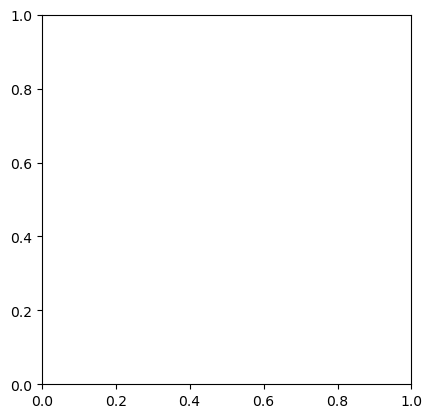

In [20]:
SINGEL_TIFF  = r"origin\060656fabe162dbdef7e4c520068d2f0.tiff"
SINGEL_MASK = r"mask\060656fabe162dbdef7e4c520068d2f0_mask.tiff"
import tifffile
import matplotlib.pyplot as plt
import cv2
import pandas as pd


img = tifffile.imread(SINGEL_MASK).ravel()
print(pd.value_counts(img))
plt.imshow(img)